Load data and libs

In [ ]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [4]:
#!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 4.4 MB/s eta 0:00:00


In [21]:
import neattext.functions as nfx

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/Jcharis/end2end-nlp-project/main/data/emotion_dataset_2.csv')

In [47]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [48]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

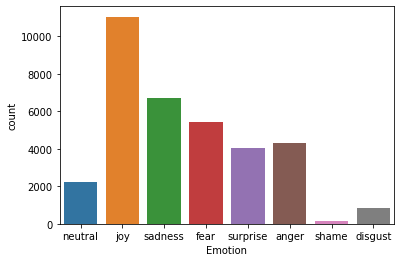

In [19]:
sns.countplot(x = 'Emotion', data=df)

In [ ]:
dir(nfx)

In [55]:
df['Clean_text'] = df.Text.apply(nfx.remove_userhandles)

In [56]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_stopwords)

In [57]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_special_characters)

In [70]:
df = df.dropna()

In [69]:
df2

,Unnamed: 0,Emotion,Text,Clean_Text,Clean_text
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,ugh babe hugggzzz u babe naamazed nga ako e b...
5,5,fear,I'm expecting an extremely important phonecall...,Im expecting extremely important phonecall min...,Im expecting extremely important phonecall min...
...,...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU,Youu JEALOUSY Losing YOU


In [71]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [72]:
x_train, x_test, y_train, y_test = train_test_split(Xfeatures,ylabels, test_size = 0.3, random_state = 42)

In [73]:
from sklearn.pipeline import Pipeline

In [74]:
#Logistic regression pipeline
pipe_lr = Pipeline(steps= [('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr.fit(x_train,y_train)

In [76]:
pipe_lr.score(x_train,y_train)

0.8976610620942234

In [77]:
ex = 'this journey is so joyful that made me happy'

In [79]:
pipe_lr.predict([ex])

array(['joy'], dtype=object)

In [80]:
pipe_lr.predict_proba([ex])

array([[3.68211763e-04, 1.20319984e-03, 6.20993965e-03, 9.84379435e-01,
        6.09553334e-06, 2.38682017e-03, 2.62551205e-05, 5.42004317e-03]])

In [83]:
#classess 
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [86]:
import joblib
pipeline_file = open('emotional_classic.pkl','wb')
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()